## Image Classification이란?
* 이미지를 분류하는 것으로, 이미지가 입력되면 시스템에서 미리 label 해놓은 분류된 이미지 집합 중, 어디에 속할지 컴퓨터가 판단하는 것이다. 하지만 기계는 사람과 달리 정밀하게 분류하기 힘들다.

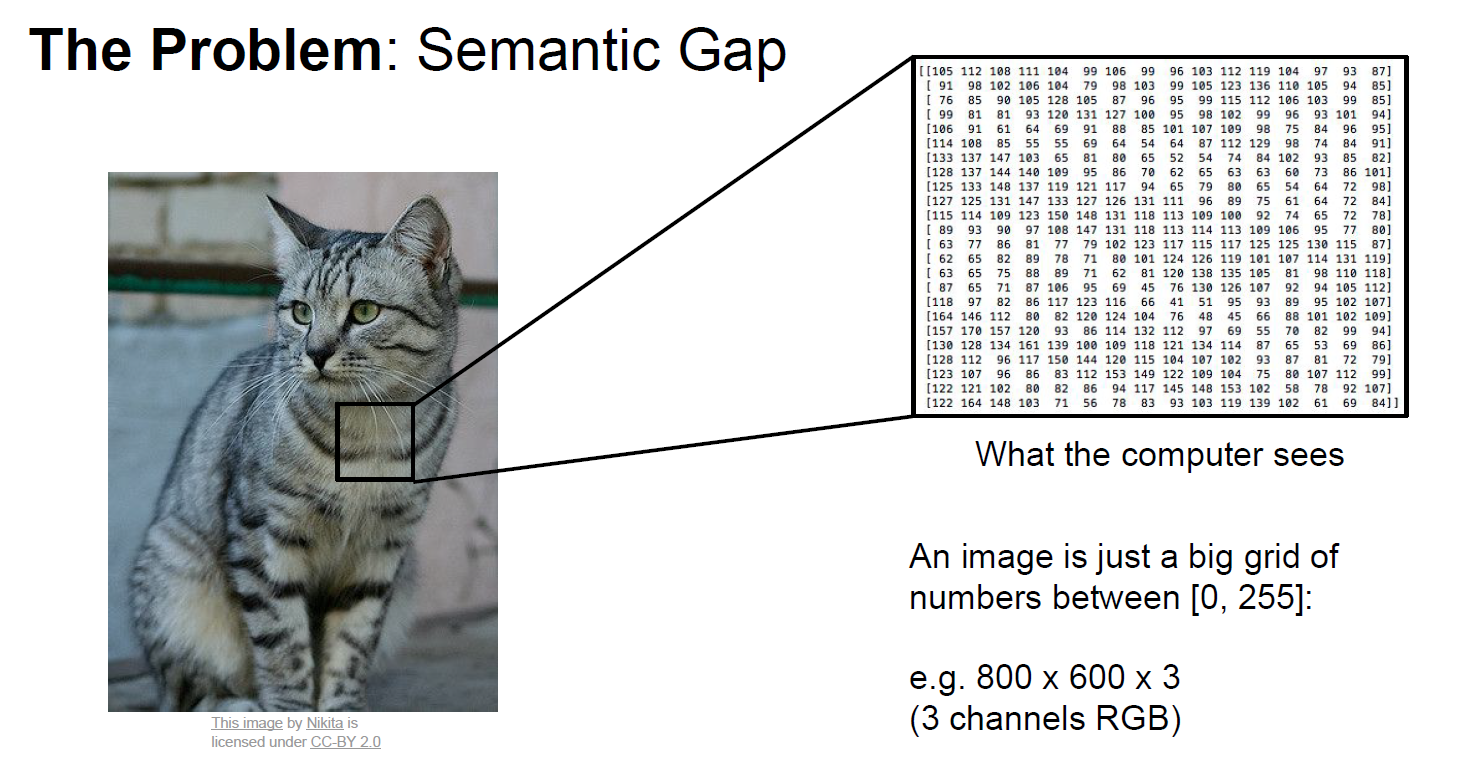

* 이미지 데이터에서는 Semantic Gap 이라는 문제가 발생한다. 먼저 이미지 데이터 구조에 대해서 알아보자
* 이미지 데이터는 위 사진처럼 각 픽셀의 값을 정보로 입력값을 받는다. (가로, 세로, 채널)로 표기하므로 해당 사진은 3채널의 컬러 사진으로 해석한다. 이미지 데이터는 input 할 때 이 픽셀 값들을 1차원 array 값으로 배열을 바꾸어 input 해준다.

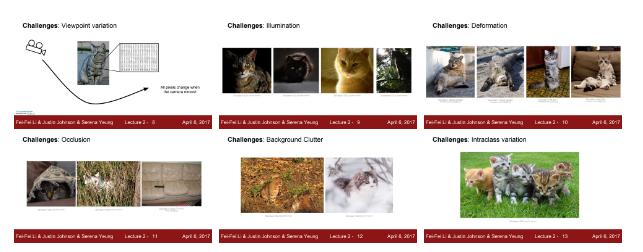

* Semantic Gap은 우리가 이미지를 눈으로 받아들이는 방식과는 달리 컴퓨터는 픽셀 값으로 받아들이기 때문에 생기는 문제들을 말합니다. 아래와 같이 6가지로 분류합니다.

     1) Viewpoint variation : 객체를 보는 시각에 따른 차이

     2) Illumination : 객체에 쏘인 조명에서 발생되는 차이

     3) Deformation : 객체의 형태 변화에 발생되는 차이

     4) Occlusion : 객체가 가려져서 발생되는 차이

     5) Background clutter : 객체와 배경의 패턴이나 색이 구분이 안되면서 나오는 차이

     6) Intraclass variation : 같은 객체들도 여러 class로 나뉘는 문제

해당 문제들은 해결하기 위해 새롭게 등장한 방법이 **데이터 중심 접근방법 (Data-Driven Approach)** 이다.

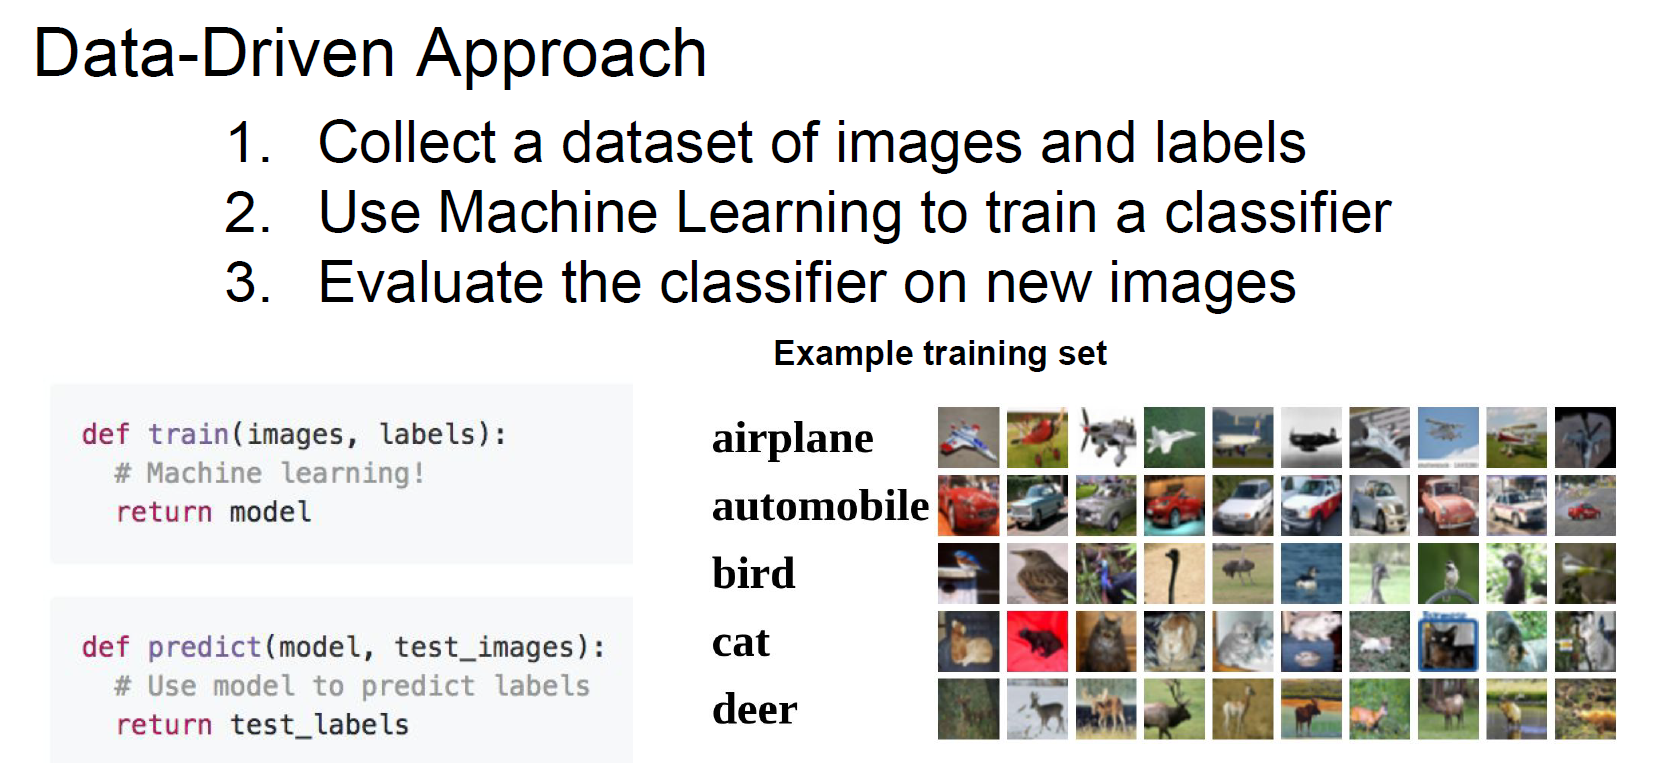

객체의 특성을 규정하지 않고, 다양한 사진들과 label을 수집하고, 이를 이용해 모델을 학습하여 사진을 새롭게 분류하는 방식이다.

분류하는 알고리즘은 여러 가지가 있는데 먼저 Nearet Neighbor(NN)에 대해서 알아보자. (with CIFAR10 데이터)

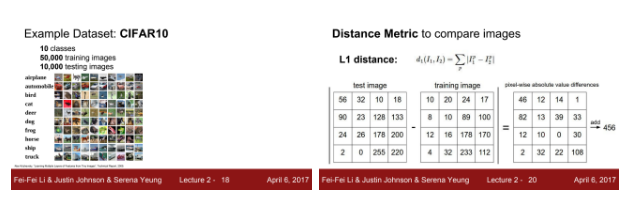

* NN은 학습단계에서 training의 정보를 모두 memory에 저장한다.
* test 셋을 집어넣고 test의 데이터와 50000개의 training 데이터와의 L1 distance값을 전부 구한다.
* 그렇게 50000개의 L1 값 중 가장 작은 값의 training 이미지의 라벨을 해당 test 값의 class로 분류한다.
* 하지만, 이 방법의 단점은 모든 사진의 픽셀 값을 계산하기 때문에 예측하는 과정에서 소요되는 시간이 상당하다. 그래서 이러한 비효율적인 문제를 해결하기 위해 보완된 방법이 K-Nearest Neigbor 이다.

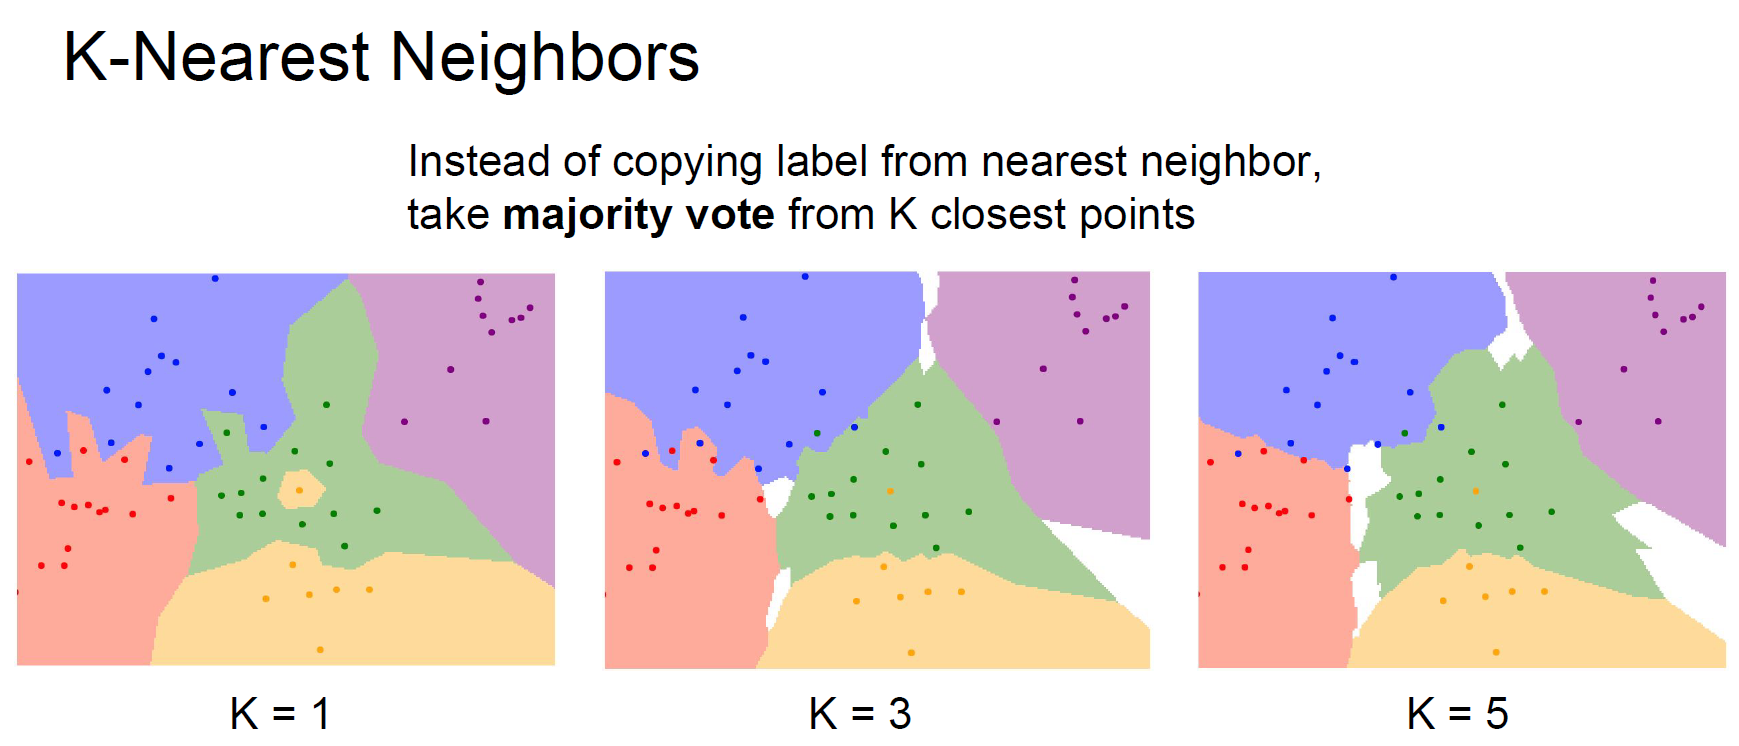

* distance metric을 이용해 가까운 이웃을 K개 만큼 찾고, 다수결을 통해 class를 부여해주는 방식이다.
* 하이퍼 파라미터도 2개나 생겼고, 이를 통해 모델 성능을 높일 수 있게 되어서 NN 보다 합리적인 방식으로 보인다.

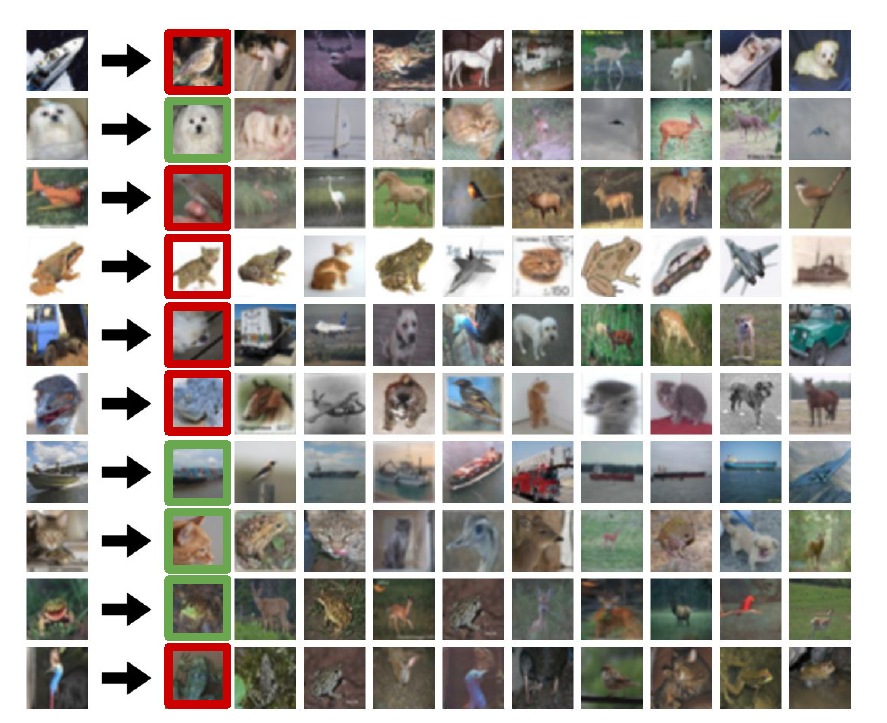

* 하지만 위 사진에서 KNN을 사용해 이미지를 분류한 결과를 보면 성능이 썩 좋진 않았다.
* 지금까지는 픽셀 간 차이에 대한 절대값 합을 이용했다면, 다른 방법으로 Euclidean Distnce (제곱 합의 제곱근)을 소개한다.

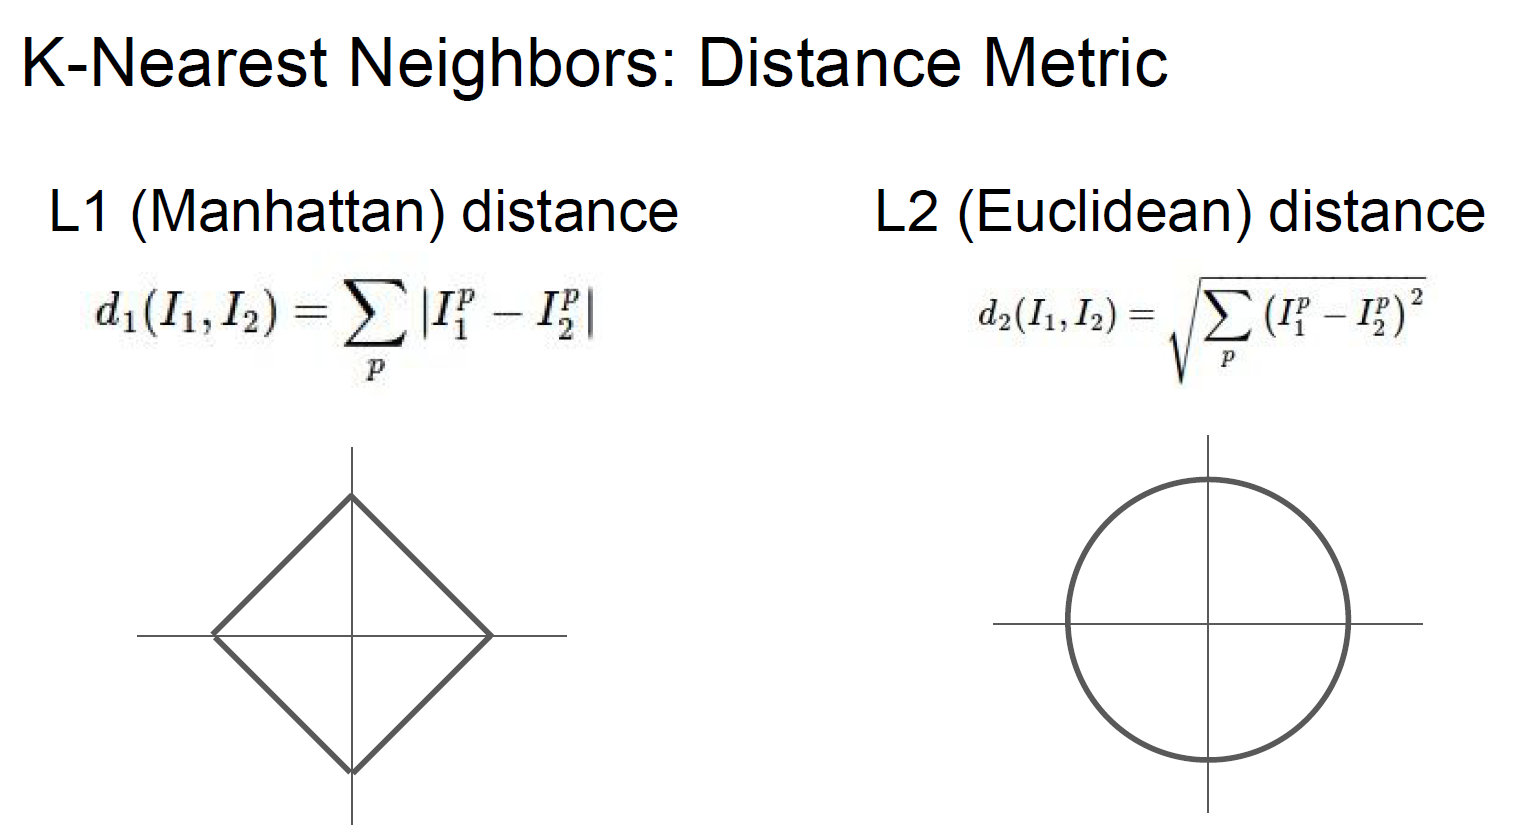

* L1 Distance는 마름모 형태라면, L2 Distance는 원형의 형태로 기하하적으로 구조가 다르다.
* 또한 L1의 경우 좌표계를 회전 시 거리값이 달라지지만 L2는 좌표에 영향을 받지 않는다.
* 즉, KNN을 사용하려면 학습 전 사전에 K와 거리척도인 하이퍼 파라미터를 선택해야 한다.
* 아래에 적절한 하이퍼 파라미터를 선택하는 방법에 대해서 소개한다.

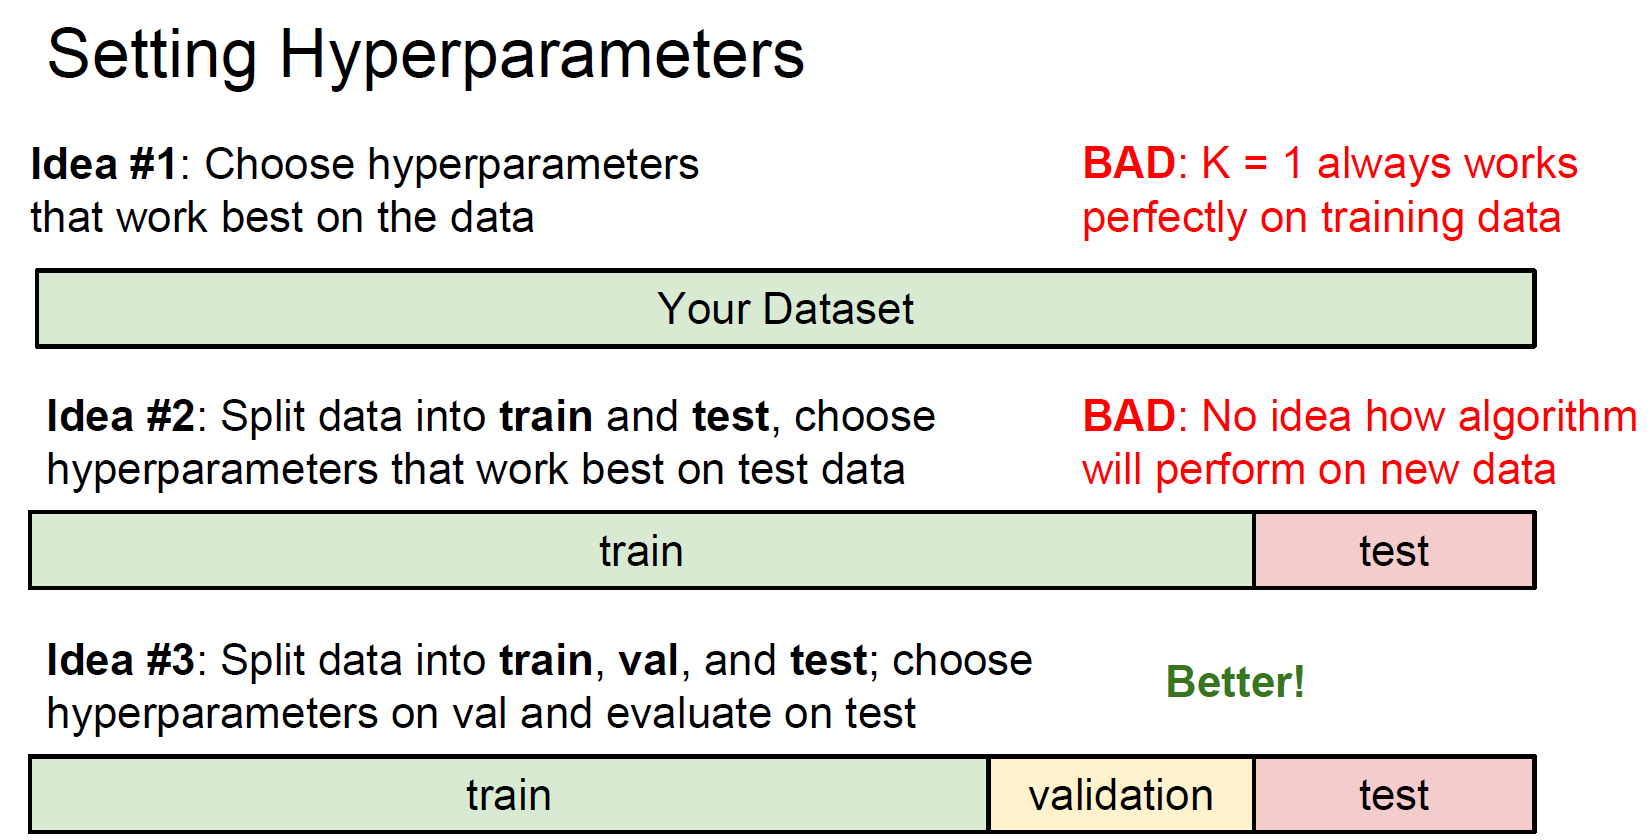
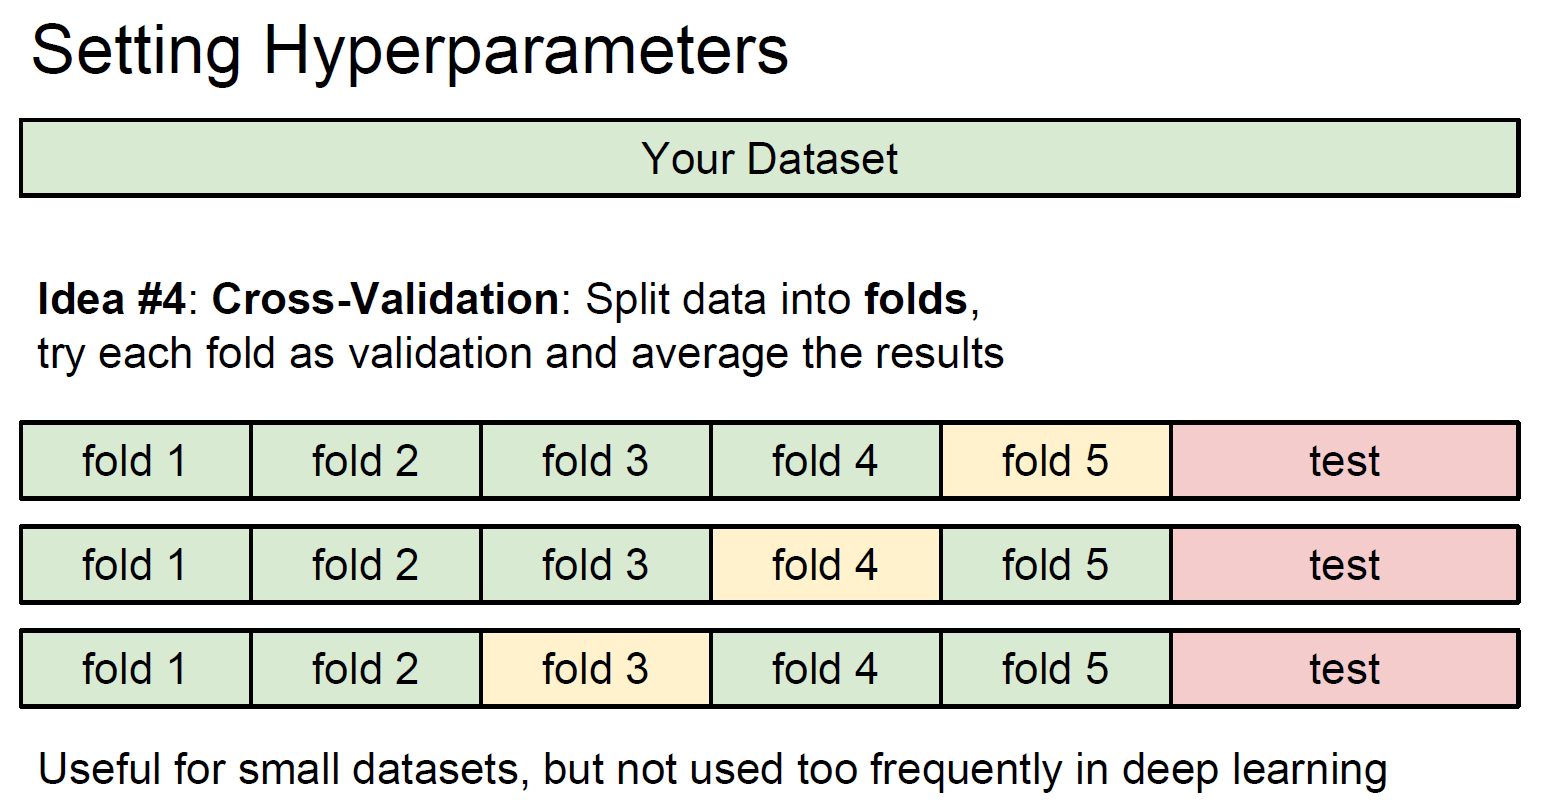

* TEST 셋으로 성능을 비교하면, 과적합의 여부를 확인할 수 없으므로 절대로 TEST 셋은 성능비교에 사용하면 안된다.
* TRAIN셋에서 VALIDATION 셋을 만들어 성능을 비교하며, BEST 조합을 찾는다.
* TRAIN 셋에 VALLIDATAION 셋까지 만들기 때문에 데이터가 부족하면 CROSS-VALLIDATAOION 기법을 이용할 수 있다.

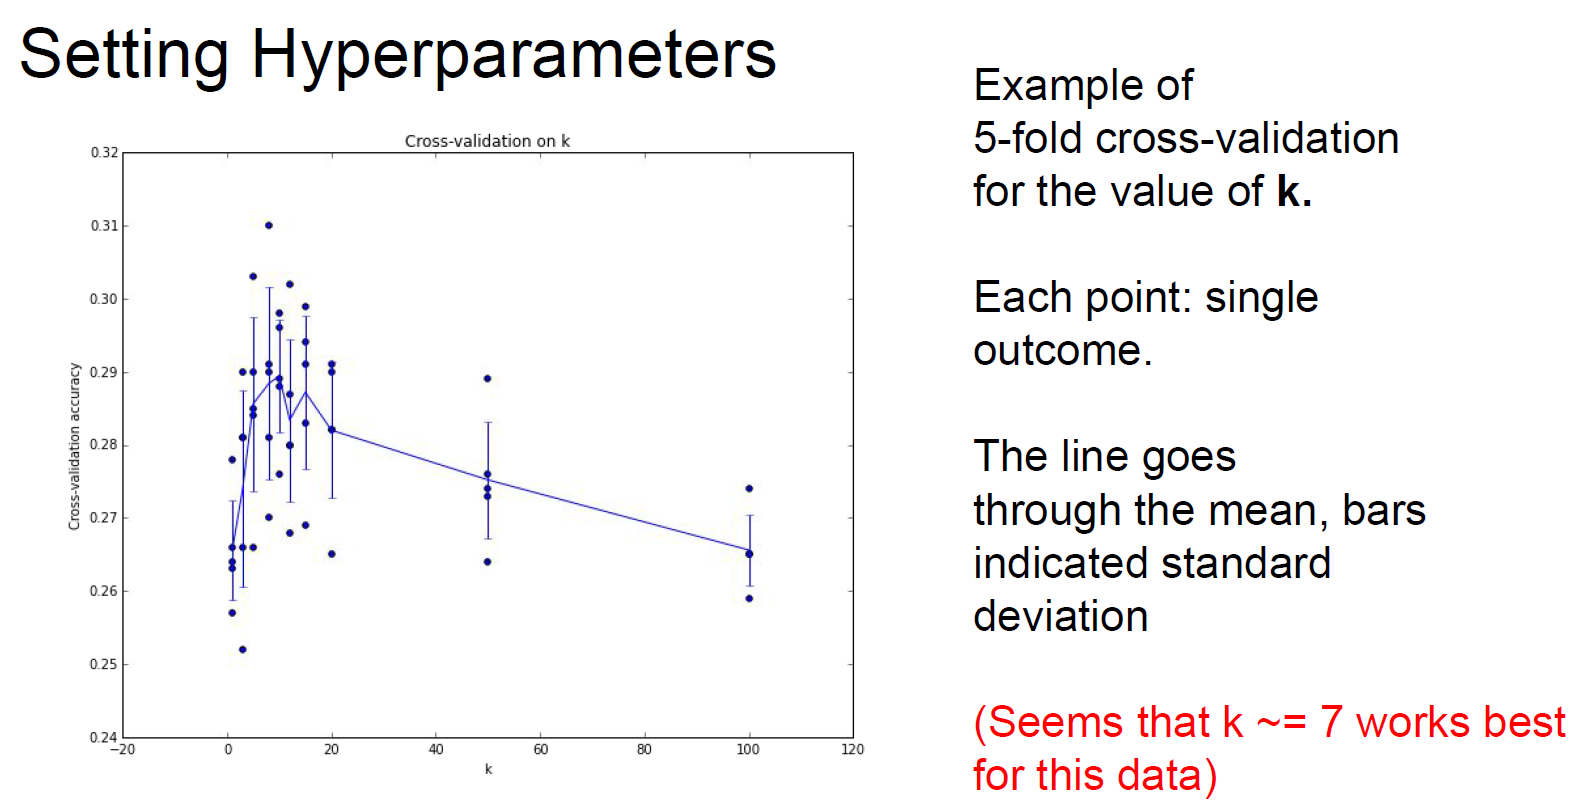

* cross-validation을 5로 지정해서 점이 5개씩 찍혀있다. 최종 결과는 K=7 일 때 평균 정확도가 높게 나온다. 하지만 정확도가 좋지 않다.

## 이미지에서 NN & K-NN을 사용하지 않는다!
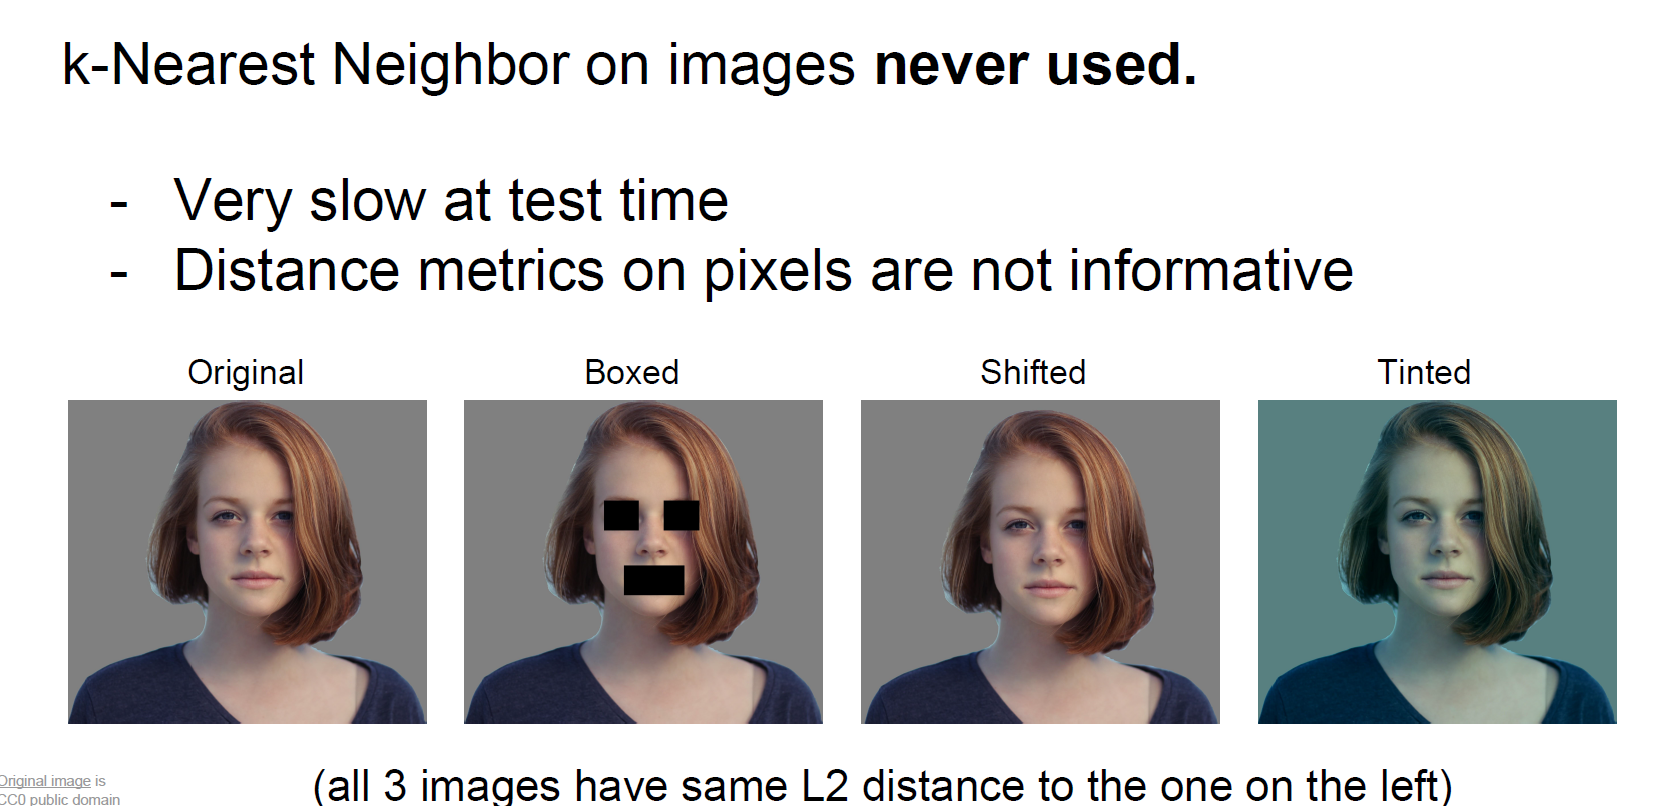
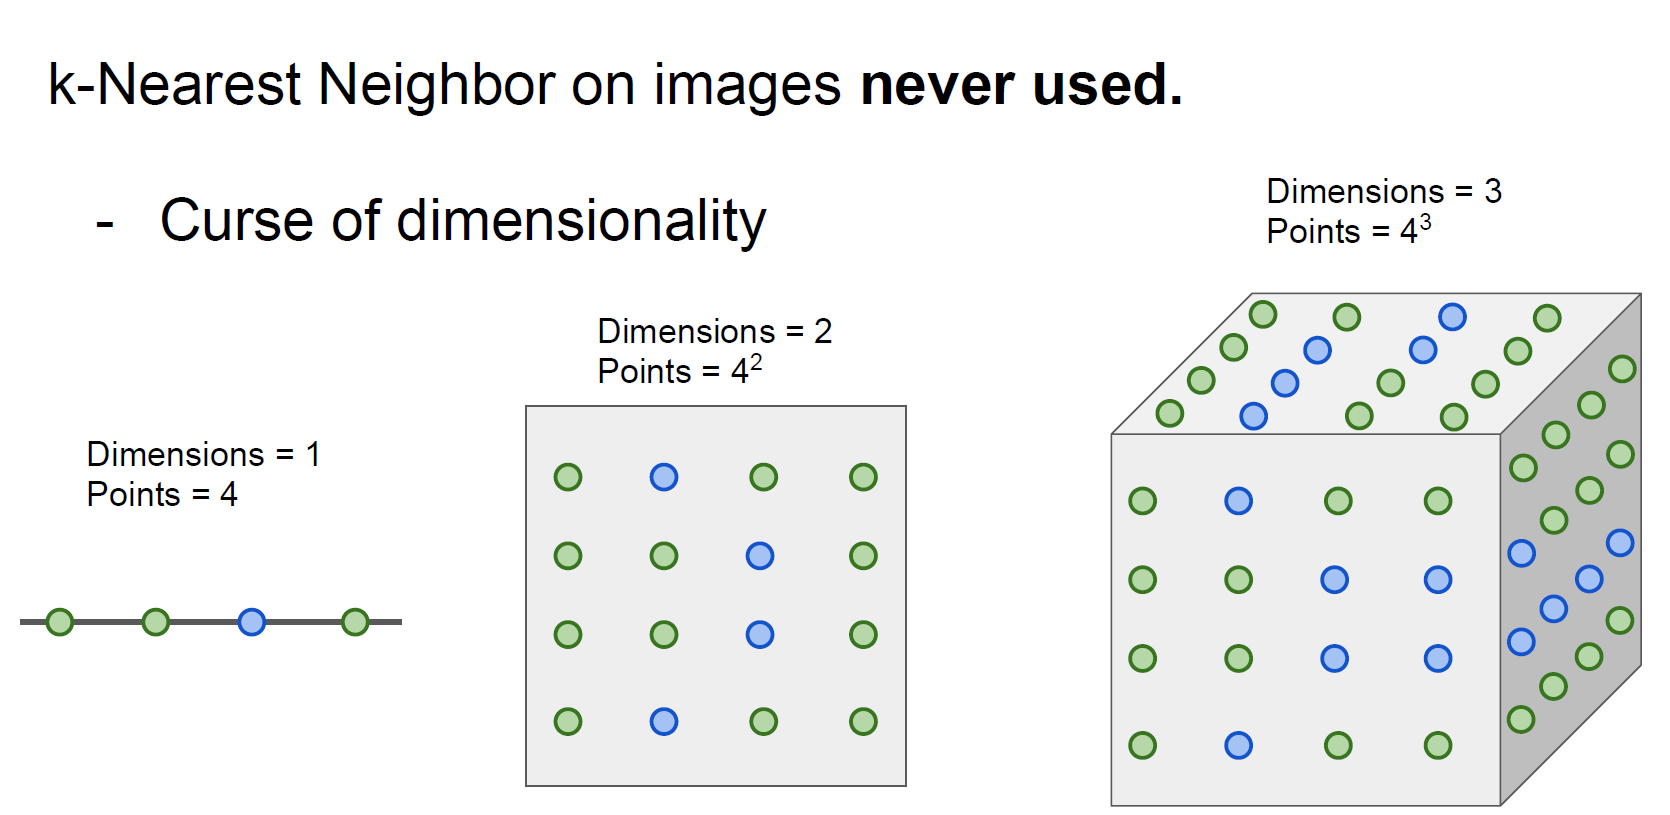

* Distance 방식을 이미지 데이터에 이용하는 것은 굉장히 비합리적인 방식이다. 이미지가 가지고 있는 다양한 특성을 고려하지 못한다. 위에서 말한 Semantic Gap을 해결하지 못한다. (시간이 오래 걸림, 차원의 저주 등..)

* 그래서 딥러닝의 Linear classification이 슬슬 등장하기 시작한다.

## Linear Classification
* Linear Classification은 NN과 Convolution Neural Network(CNN)의 기반 알고리즘이다. NN을 구축할 때 다양한 컴포넌트를 사용할 수 있는데, 이 컴포넌트들을 한데 모아서 CNN을 이루게 된다. 이 방법은 NN보다 효율적이고 빠르게 계산된다.

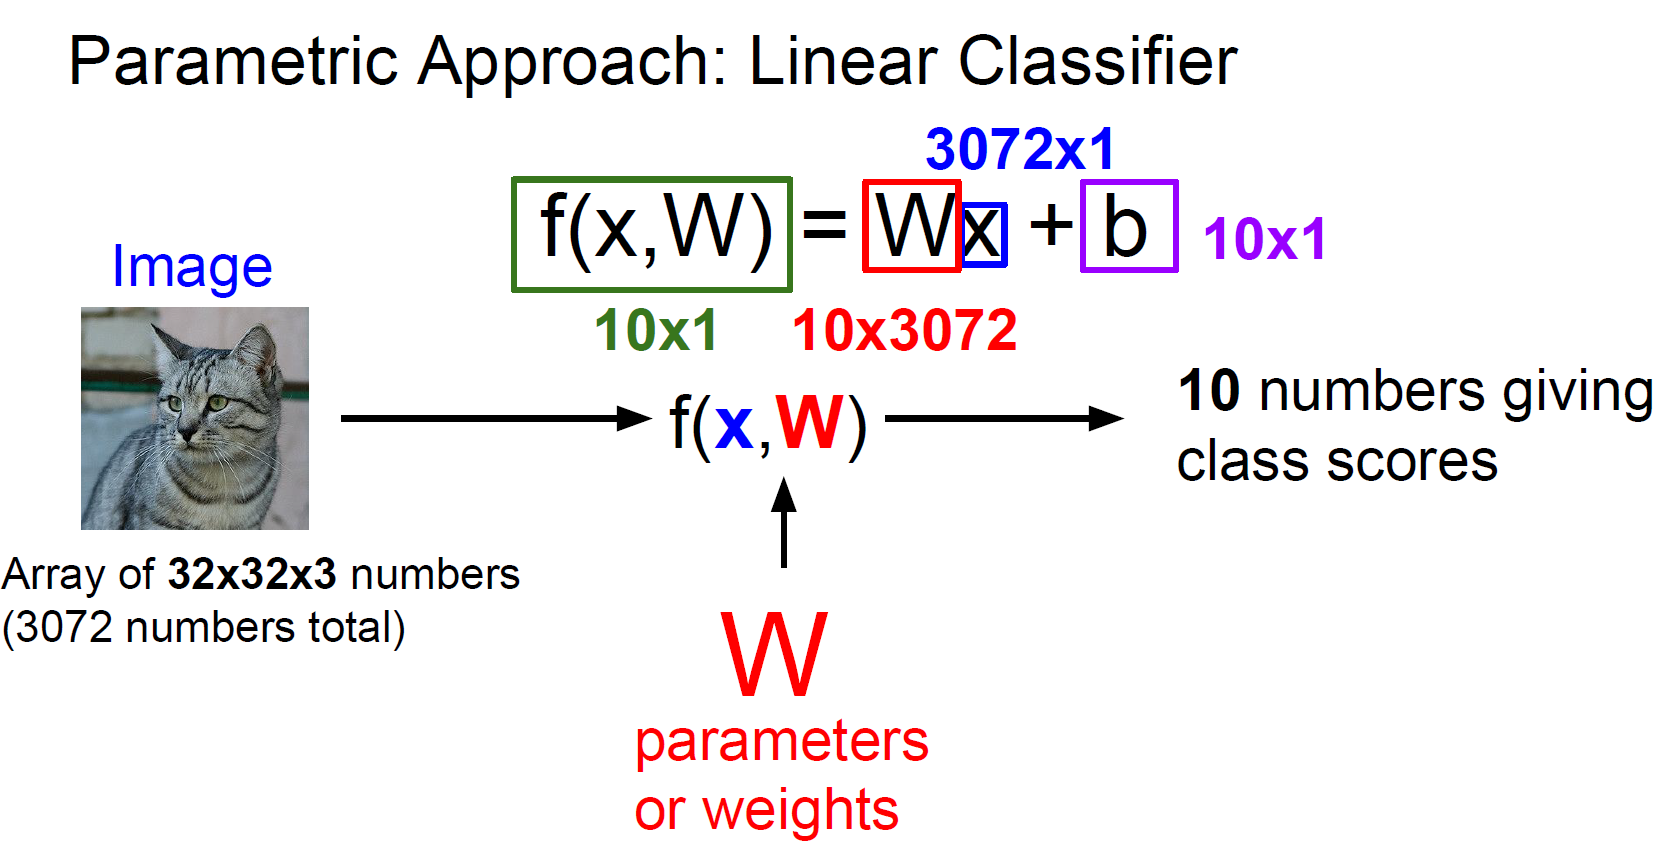

* 위 고양이 사진(32x32x3)을 예시로 입력(X)을 받으면, 가중치 파라미터(W) 곱하여 카테고리 score 값 f(x,W)인 10을 만든다. score 값이 높을수록 고양이일 확률이 높다.
* W*x 뒤에 bias(편향 값)을 더하는데, bias는 입력과는 직접적인 관계를 가지진 않지만 이미지 라벨의 불균형한 상태를 보완하기 위해 사용된다.

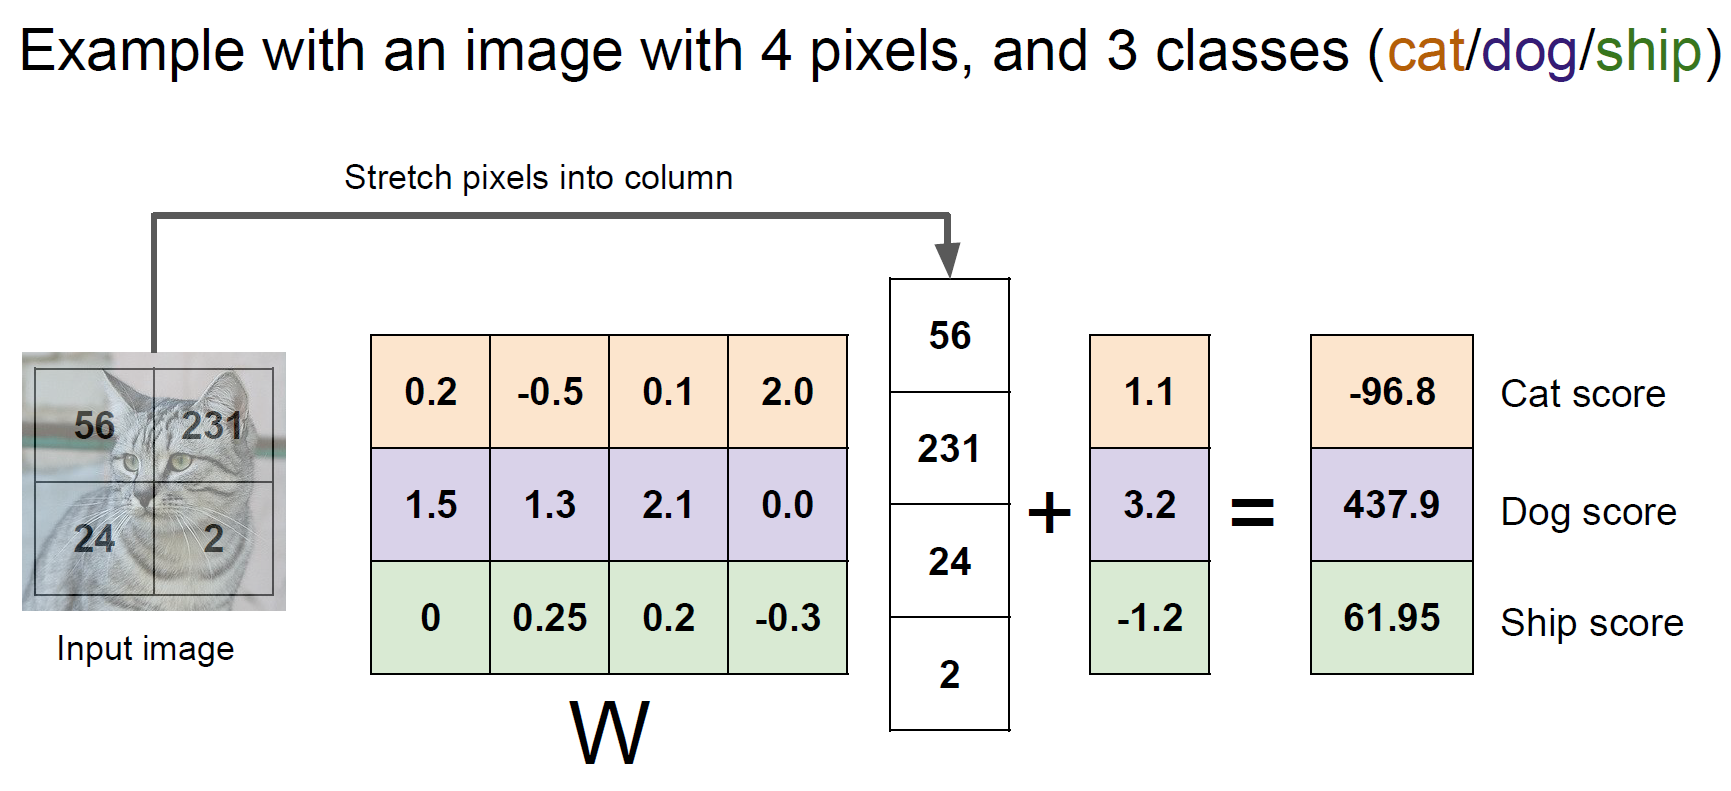

* 위 사진을 예시로, 입력으로 2*2 형태인 고양이 사진을 받으면 linear classifer는 4-dim 열 형태로 퍼진다.
* 그리고 각각의 가중치와 입력 이미지 값들의 내적합 값에 bias를 더하면 score 값이 구해진다.
* 해당 값 중에서 가장 높은 값의 class로 분류된다.

## Linear classifer의 한계
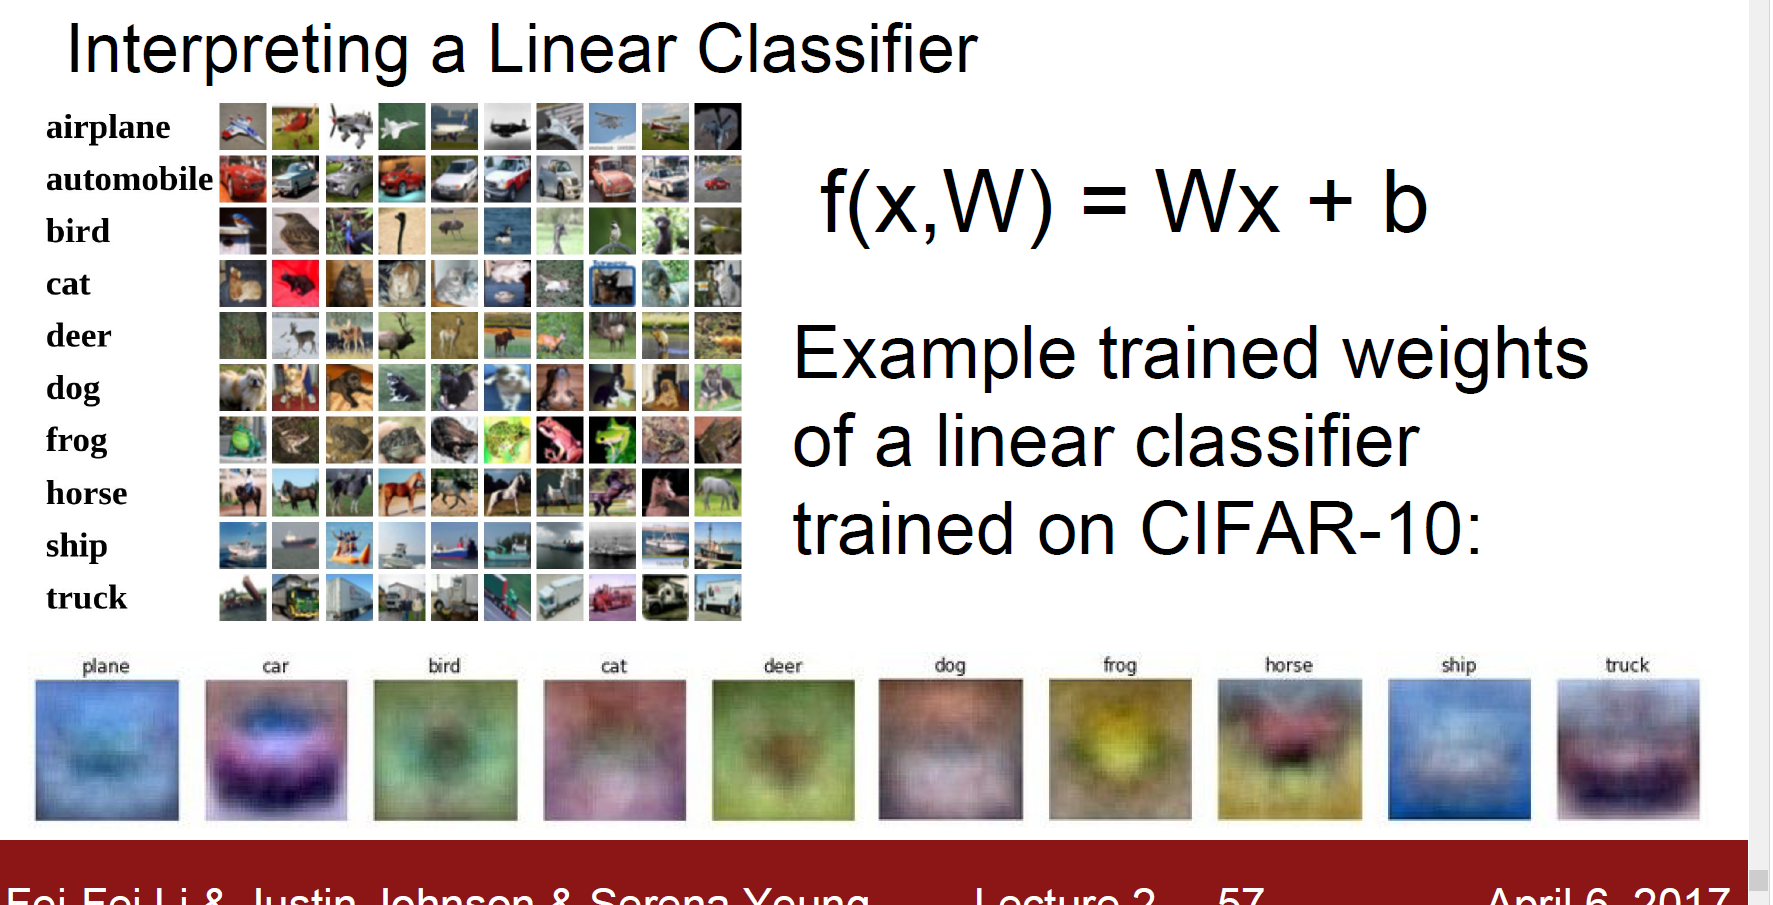
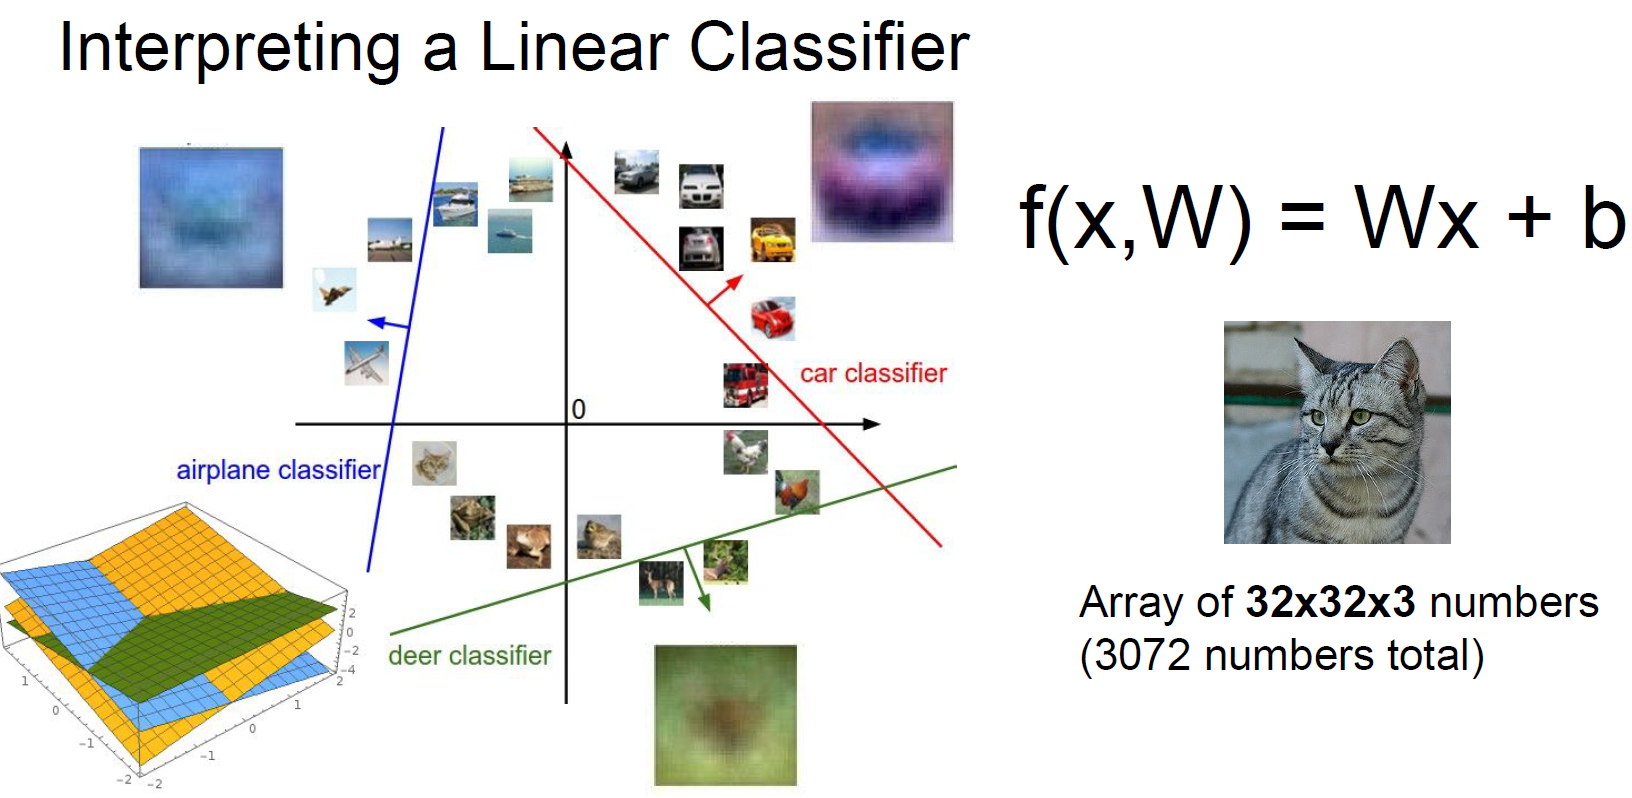

* NN기법에서의 분류시간 단점과, 각 클래스별로 가중치가 배정되기 때문에 합리적이다고 말할 수 있지만, 아직도 정확도가 낮다.
* 왜냐하면 공간 정보를 활용할 수 없다는 단점을 가지고 있기 때문이다.
* 정확하게 말하면 이미지를 고차원 공간으로 보내면, Linear Classifer는 각 클래스를 구분해주는 선형 경계 역할을 하지만 일차함수 직선으로 분류되지 않은, 즉 데이터의 분포에 따라 선형으로 분류할 수 없는 데이터가 대부분이다. -> Multimodal problem

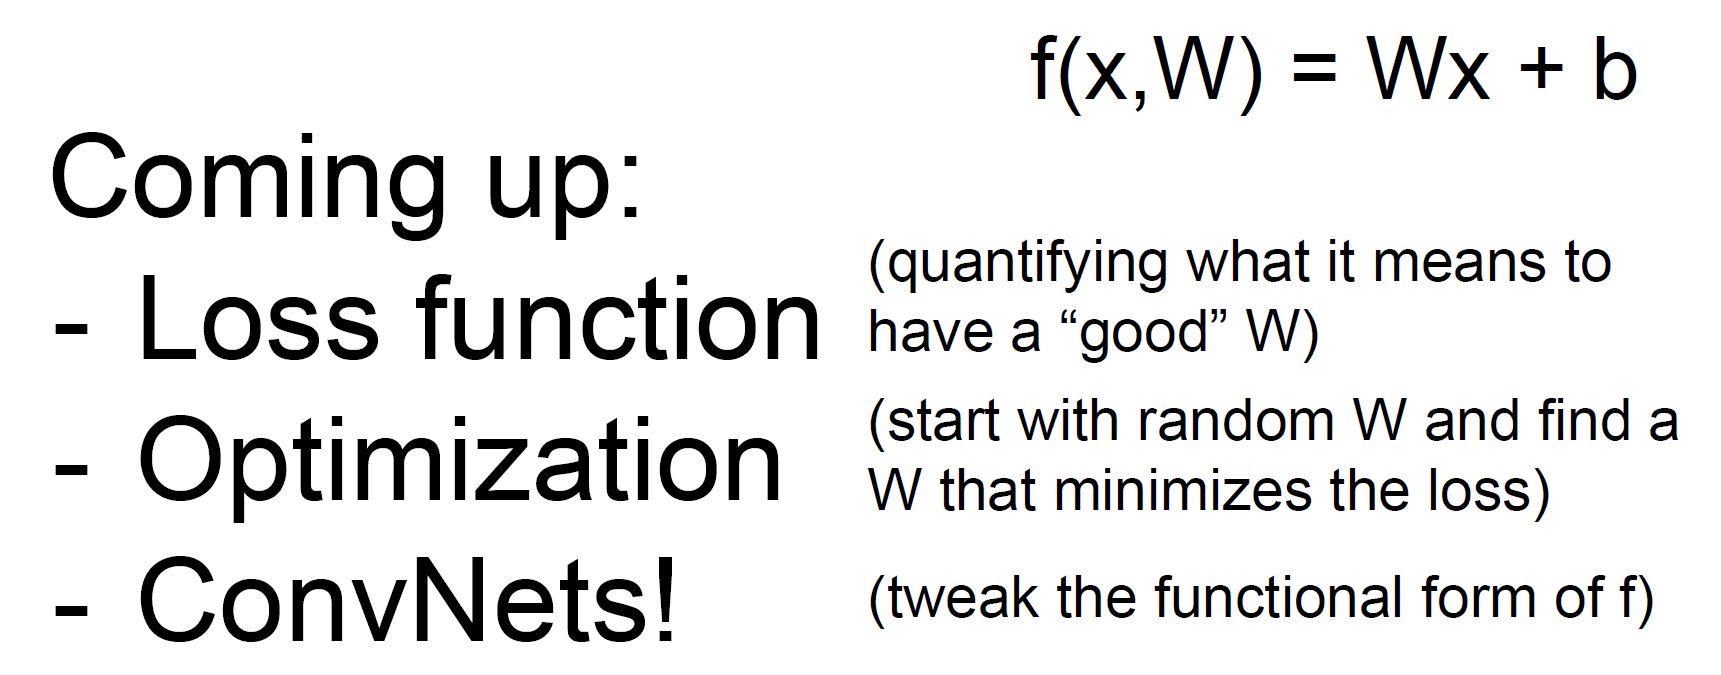

* 해당 단점을 보완하기 위해 W 가중치 설정이 중요하고, 다음 장에서 W로 어떻게 설정할지에 대한 방법을 이야기해 볼 것이다.